In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
df = pd.read_csv("fitness_dataset.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [6]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,1840.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.502031,2.864156,1.136383,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.500000,2.547500,2.037500,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.600000,7.470000,3.950000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


In [48]:
df.describe(include="object")

,smokes,gender
count,2000,2000
unique,4,2
top,yes,F
freq,711,1030


In [37]:
df.isna().sum() / len(df) * 100

age                  0.0
height_cm            0.0
weight_kg            0.0
heart_rate           0.0
blood_pressure       0.0
sleep_hours          8.0
nutrition_quality    0.0
activity_index       0.0
smokes               0.0
gender               0.0
is_fit               0.0
dtype: float64

In [12]:
# preenche dados faltantes da fearure sleep_hours com a media
df['sleep_hours'] = df['sleep_hours'].fillna(df['sleep_hours'].mean())

In [51]:
df["smokes"].unique()

array(['no', '0', 'yes', '1'], dtype=object)

In [ ]:
df['smokes'] = df['smokes'].replace({'yes': 1, 'no': 0, 1: 1, 0: 0})
df['smokes'] = df['smokes'].replace({'1': 1, '0': 0})
df['gender'] = df['gender'].map({'F': 1, 'M': 0})

In [55]:
df["smokes"].unique()

array([0, 1], dtype=int64)

In [78]:
X = df.drop("is_fit", axis=1)
y = df["is_fit"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
X_train_b = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_b = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

In [105]:
# Funções do modelo e do algoritmo de treinamento

def sigmoid(z):
    '''
    Função de ativação sigmoid
    Converte em valor real em uma probabilidade entre 0 e 1.
    '''
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, alpha, iteractions):
    '''
    Algoritmo de Gradiente descendente para regressão logistica
    Encontra os melhores pesos (theta) para minimizar a função de custo.
    '''
    m = len(y)
    theta = np.zeros(X.shape[1]) # Iniciando os pesos
    costs = [] # Lista para armazenar o custo, vazia

    for i in range(iteractions):
        # Passo 1. Calcular a hipotese (saida do modelo)
        z = np.dot(X, theta) # Dados * pesos
        h = sigmoid(z) # Aplica função sigmoide

        # Passo 2. Calcular o erro (diferença entre previsão e valor real)
        error = h - y

        # Passo 3. Calcular o gradiente (derivada da função de custo)
        gradient = np.dot(X.T, error) / m

        # Passo 4. Atualizar os pesos (dar um passo na direção oposta ao gradiente)
        theta = theta - alpha * gradient

        # Passo 5. Calcular o custo e armazenar para visualização
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        costs.append(cost)

    return theta, costs

## Fazer previsões com modelo
def predict(X, theta):
    z = np.dot(X, theta)
    return (sigmoid(z) >= 0.5).astype(int)

In [106]:
# Treinamento e avaliação
alpha = 0.1
iteractions = 1000

In [107]:
print("\nIniciando o treinamento do modelo, aguarde...")
theta_final, cost = gradient_descent(X_train_b, y_train, alpha, iteractions)
print("Treinamento finalizado!")
print(f"Pesos (theta) e final custo: {theta_final}, {cost[-1]}")


Iniciando o treinamento do modelo, aguarde...
Treinamento finalizado!
Pesos (theta) e final custo: [nan nan nan nan nan nan nan nan nan nan nan], -0.0


In [108]:
# Fazer previsões no conjunto de teste e calcular acurária
y_pred = predict(X_test_b, theta_final)
accuracy = np.mean(y_pred == y_test)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 0.5875


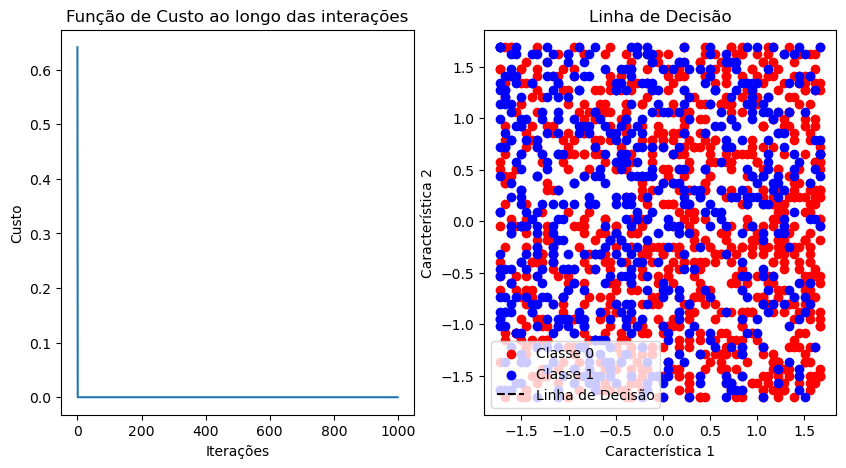

In [113]:
## Graficos para visualizar o resultado do treinamento

plt.figure(figsize=(10, 5)) # Quadro

# plot 1: Grafico de função de custo
plt.subplot(1, 2, 1) # 1 linha, 2 colunas e estamos no indice 1
plt.plot(cost)
plt.title('Função de Custo ao longo das interações')
plt.xlabel('Iterações')
plt.ylabel('Custo')

# Plot 2: Grafico de linha de decisão
plt.subplot(1, 2, 2) # 1 linha, 2 colunas e estamos no indice 2
plt.scatter(X_train_b[y_train == 0, 1], X_train_b[y_train == 0, 2], color='red', label='Classe 0')
plt.scatter(X_train_b[y_train == 1, 1], X_train_b[y_train == 1, 2], color='blue', label='Classe 1')

# Plotar a linha de decisão (onde a probabilidade for 0.5, ou seja, theta * X = 0)
x_vals = np.array([np.min(X_train_b[:, 1]), np.max(X_train_b[:, 1])])
y_vals = -(theta_final[0] + np.dot(theta_final[1], x_vals)) / theta_final[2]
plt.plot(x_vals, y_vals, '--', color='black', label='Linha de Decisão')

plt.title('Linha de Decisão')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

## **Abordagem completa**

In [125]:
# Versões atualizadas das funções

def gradient_descent(X, y, weights=None, bias=None, alpha=0.01, iterations=1000):
    """
    Atualiza pesos e bias usando gradiente descendente.
    Se weights ou bias não forem passados, iniciam em zeros.
    """
    m, n = X.shape
    
    # Converter y em array (m,1)
    if isinstance(y, np.ndarray):
        y_array = y.reshape(-1, 1)
    else:  # se for Series
        y_array = y.to_numpy().reshape(-1, 1)
    
    # Inicializar pesos e bias
    if weights is None:
        weights = np.zeros((n, 1))
    else:
        weights = np.array(weights).reshape(n, 1)
    if bias is None:
        bias = 0

    costs = []

    for i in range(iterations):
        z = np.dot(X, weights) + bias
        h = sigmoid(z)

        error = h - y_array
        dw = np.dot(X.T, error) / m
        db = np.sum(error) / m

        weights -= alpha * dw
        bias -= alpha * db

        cost = -1/m * np.sum(y_array * np.log(h + 1e-8) + (1 - y_array) * np.log(1 - h + 1e-8))
        costs.append(cost)
    
    return weights.flatten(), bias, costs

def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights.reshape(-1,1)) + bias
    return (sigmoid(z) >= threshold).astype(int).flatten()

def initialize_weights(n, init_type="zeros"):
    if init_type == "zeros":
        return np.zeros(n)
    elif init_type == "random_small":
        return np.random.normal(0, 0.01, n)
    else:
        raise ValueError("init_type inválido. Use 'zeros' ou 'random_small'.")

## Grid Search 

def grid_search_logistic(X_train, y_train, X_test, y_test, learning_rates, iterations_list, init_types):
    X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
    X_test_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
    y_train_series = y_train
    y_test_series = y_test

    best_acc = -1
    best_params = {}

    plt.figure(figsize=(12,6))
    color_idx = 0
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for lr in learning_rates:
        for iters in iterations_list:
            for init in init_types:
                weights_init = initialize_weights(X_train_np.shape[1], init)
                weights, bias, costs = gradient_descent(
                    X_train_np,
                    y_train_series,
                    weights=weights_init,
                    bias=None,
                    alpha=lr,
                    iterations=iters
                )

                # Predição no conjunto de teste
                y_pred = predict(X_test_np, weights, bias)
                acc = (y_pred == y_test_series.to_numpy()).mean()

                print(f"LR={lr}, Iter={iters}, Init={init}, Test Accuracy={acc:.4f}, Final Cost={costs[-1]:.4f}")

                # Atualiza melhor modelo
                if acc > best_acc:
                    best_acc = acc
                    best_params = {
                        "weights": weights,
                        "bias": bias,
                        "learning_rate": lr,
                        "iterations": iters,
                        "init_type": init,
                        "costs": costs,
                        "accuracy": acc
                    }

                # Gráfico do custo por iteração
                plt.plot(costs, label=f"LR={lr}, Iter={iters}, Init={init}", color=colors[color_idx % len(colors)])
                color_idx += 1

    plt.title("Custo por Iteração")
    plt.xlabel("Iteração")
    plt.ylabel("Custo")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nMelhores parâmetros encontrados:")
    for k, v in best_params.items():
        if k != "weights":  # não printar vetor de pesos longo
            print(f"{k}: {v}")
    return best_params

In [126]:
LEARNING_RATES = [0.01, 0.05, 0.1]
ITERATIONS = [200, 500]
INIT_TYPES = ["zeros", "random_small"]

LR=0.01, Iter=200, Init=zeros, Test Accuracy=0.5875, Final Cost=nan
LR=0.01, Iter=200, Init=random_small, Test Accuracy=0.5875, Final Cost=nan
LR=0.01, Iter=500, Init=zeros, Test Accuracy=0.5875, Final Cost=nan
LR=0.01, Iter=500, Init=random_small, Test Accuracy=0.5875, Final Cost=nan
LR=0.05, Iter=200, Init=zeros, Test Accuracy=0.5875, Final Cost=nan
LR=0.05, Iter=200, Init=random_small, Test Accuracy=0.5875, Final Cost=nan
LR=0.05, Iter=500, Init=zeros, Test Accuracy=0.5875, Final Cost=nan
LR=0.05, Iter=500, Init=random_small, Test Accuracy=0.5875, Final Cost=nan
LR=0.1, Iter=200, Init=zeros, Test Accuracy=0.5875, Final Cost=nan
LR=0.1, Iter=200, Init=random_small, Test Accuracy=0.5875, Final Cost=nan
LR=0.1, Iter=500, Init=zeros, Test Accuracy=0.5875, Final Cost=nan
LR=0.1, Iter=500, Init=random_small, Test Accuracy=0.5875, Final Cost=nan


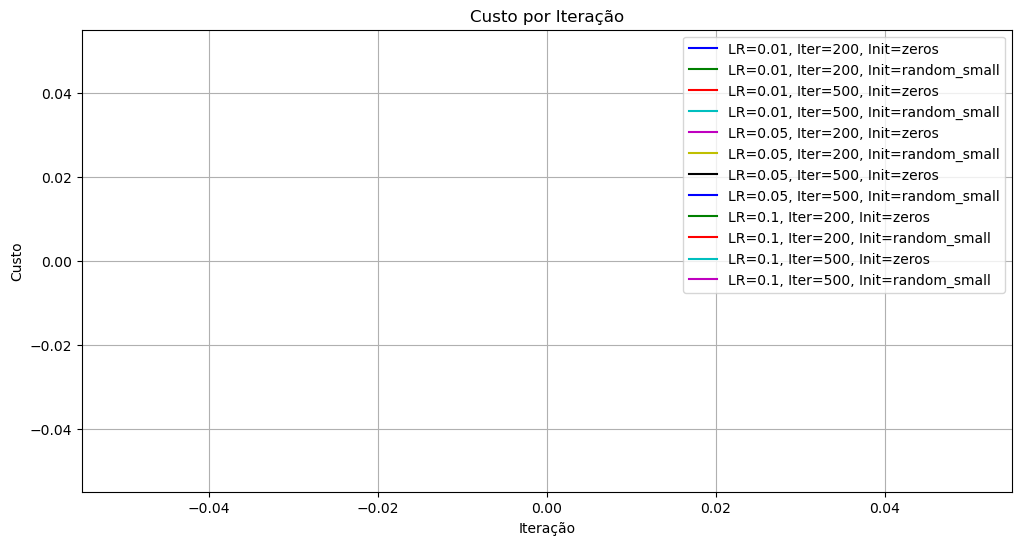


Melhores parâmetros encontrados:
bias: nan
learning_rate: 0.01
iterations: 200
init_type: zeros
costs: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [127]:
best_model = grid_search_logistic(X_train, y_train, X_test, y_test,
                                   learning_rates=LEARNING_RATES,
                                   iterations_list=ITERATIONS,
                                   init_types=INIT_TYPES)